# Equações de Friedmann sem perturbações

Primeiro vamos explorar ao máximo as equações de Friedmann, para o modelo $\Lambda CDM$ em um universo plano ($k = 0$). As equações são:

$$ \left( \frac{\dot a}{a} \right)^2 = \frac{8 \pi G \rho}{3}  $$ 

$$ \dot{\rho} + 3 \frac{\dot{a}}{a} (\rho + P)=0 $$

$$ \frac{\ddot a}{a} = -\frac{4 \pi G}{3}\left(\rho + \frac{3p}{c^2}\right) $$ 





A densidade de energia para o modelo $\Lambda CDM$, com $k \approx 0$, é distribuida da segunte forma:

$$ \Omega_m + \Omega_r + \Omega_\Lambda = 1 $$

$$ \Omega_m = 0.3089 \pm 0.0062, \Omega_r \approx 10^{-5}, \Omega_\Lambda = 0.6911 \pm 0.0062 $$

$$ \Omega_i = \frac{\rho_i}{\rho_{cr}} $$

O valor de $ \rho_{cr} $ pode ser obtido a partir da primeira equação de Friedmann:

$$ \rho_{cr} = \frac{3H_0}{8 \pi G} $$

Onde $H_0$ é $ 69.8 \pm 1.9 (km/s)/Mpc $

In [49]:
#Estas constante serão utilizadas extensivamente#

H_0 = 69.8

Omega_m = 0.3089

Omega_r = 10**-5

Omega_L = 0.6911

Mpc2km= 3.1e19 #Mpc para km

seg2year= 3.2e-8 # segundos para ano

## Fator de escala em função do tempo

Dividindo a primeira equação de Friedmann por $ \rho_{cr} $, e substituindo cada componente da energia do universo com sua respectiva potência de $a$ obtemos: 

$$\frac{da}{dt}= a H_0\left(\frac{\Omega_m}{a^3}+\frac{\Omega_r}{a^4}+\Omega_\Lambda \right)^{1/2}$$

Onde podemos resolver para $a(t)$

Text(0, 0.5, 'Scale factor')

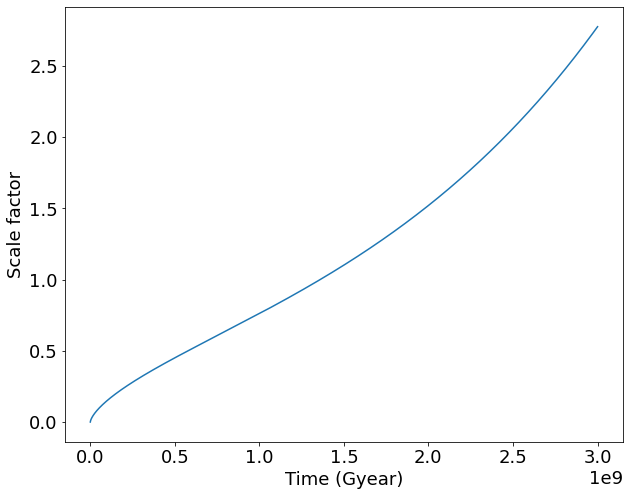

In [66]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

time=np.linspace(1e-8,30e9,50000)

#Equação acima

Friedmann= lambda  a, time, H_0, Mpc2km, seg2year, Omega_m, Omega_r, Omega_L : \
         a * H_0 / (Mpc2km * seg2year) *(Omega_m / a**3 + Omega_r / a**4 + Omega_L)**(1/2)

#tuple com os parâmetros comsológicos

Param=(H_0, Mpc2km, seg2year, Omega_m, Omega_r, Omega_L)

#Cálculo do fator de escala

scale_factor=integrate.odeint(Friedmann,1e-18,time,args=Param)

#Gráfico

plt.rcParams['figure.figsize']=[10,8]
plt.rcParams.update({'font.size':18})
fig,ax=plt.subplots()
ax.plot(time/10,scale_factor)
ax.set_xlabel('Time (Gyear)')
ax.set_ylabel('Scale factor')

## Constante de Hubble em função do fator de escala

Substituindo $\frac{\dot a}{a}$ por $H$: 

$$ H = H_0 \sqrt{\left(\frac{\Omega_m}{a^3} + \frac{\Omega_r}{a^4} +\Omega_\Lambda \right)} $$

Text(0.5, 0, 'Fator de escala')

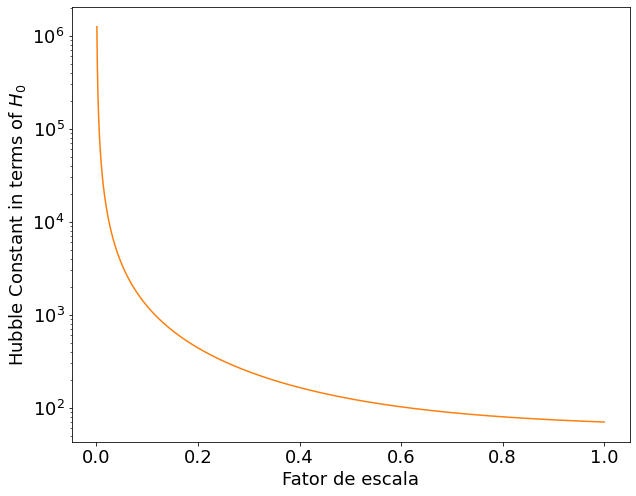

In [67]:
a = []
Hubble = []

#H(a), a equação acima#

def H_a(H_0, O_m, O_r, O_L, i):
    return (H_0)*((O_r)*(i**(-4)) + (O_m)*(i**(-3)) + O_L)**0.5

for i in np.arange(0.001, 1, 0.0001):
    a.append(i)
    H = H_a(H_0, Omega_m, Omega_r, Omega_L, i)
    Hubble.append(H)

plt.plot(a, Hubble, "C1")
plt.yscale('log')
plt.ylabel('Hubble Constant in terms of $H_0$')
plt.xlabel('Fator de escala')

## Contante de Hubble em função do redshift

A partir da primeira equação de Friedmann e substituindo o fator de escala usando a seguinte relação:

$$ a(t) = \frac{1}{1 + z} $$

A expressão para a Constante de Hubble em função do Redshift se torna:

$$ H = H_0 \sqrt{\left(\Omega_m\left(1 + z\right)^3 + \Omega_r\left(1 + z\right)^4 +\Omega_\Lambda \right)} $$

Text(0.5, 0, 'Redshift z')

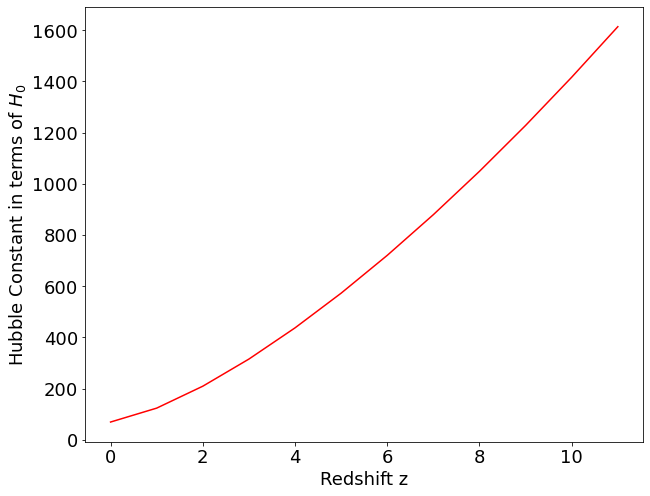

In [68]:
z = []
Hubble = []

def H_z(H_0, O_m, O_r, O_L, i):
    return (H_0)*((O_m)*((1+i)**3) + (O_r)*((1+i)**4) + (O_L))**0.5

for i in range(12):
    z.append(i)
    H = H_z(H_0, Omega_m, Omega_r, Omega_L, i)
    Hubble.append(H)

plt.plot(z, Hubble, 'r')
plt.ylabel('Hubble Constant in terms of $H_0$')
plt.xlabel('Redshift z')

## Dependência da constante de Hubble com a idade do Universo

Já calculamos $a(t)$ e $H(a)$, logo, podemos encontrar $H(t)$

Text(0.5, 0, 'Time (years)')

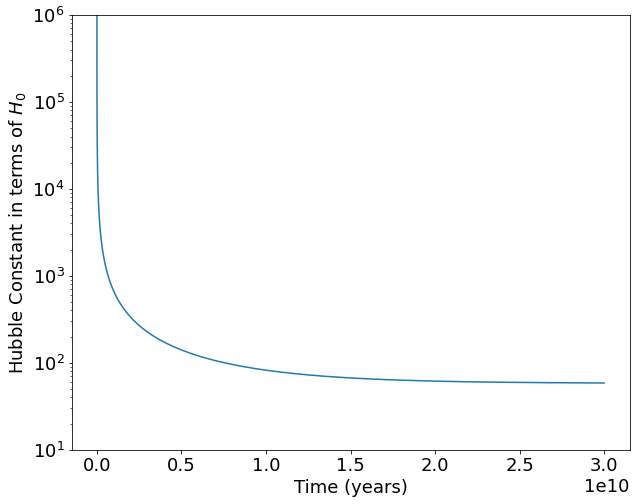

In [69]:
#Aqui eu tentei utilizar a função scale_factor para compor a dependência de H(a(t)), para um dado t em time, calculamos o valor de a com a scale_factor
#e utilizamos o valor para calcular H a partir da função H_a.

Hubble_t = []

for i in range(len(scale_factor)):
    Hubble_t.append(H_a(H_0, Omega_m, Omega_r, Omega_L, scale_factor[i][0]))
    
plt.plot(time, Hubble_t)
plt.yscale('log')
plt.ylim(10, 10e5)
plt.ylabel('Hubble Constant in terms of $H_0$')
plt.xlabel('Time (years)')

## $\dot a$ em função do tempo

Podemos ver variações na inclinação do fator de escala no primeiro gráfico, isso indica uma troca de dominância para uma determinada espécie de energia. Uma análise de quando isso ocorre pode ser feita a partir da derivada temporal do fator de escala, $\dot a$:

$$aH = a\frac{\dot a}{a} = \dot a = H_0 \sqrt{\left(\frac{\Omega_m}{a} + \frac{\Omega_r}{a^2} +\Omega_\Lambda a^2 \right)} $$

Text(0.5, 0, 'Age of th universe (years)')

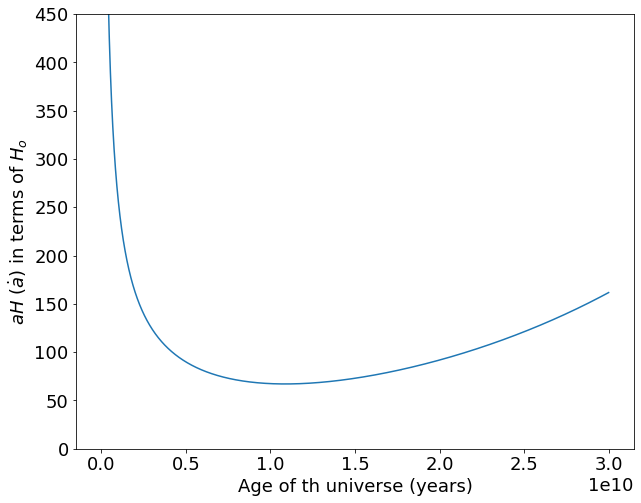

In [75]:
a_dot = []

def aH_a(H_0, O_m, O_r, O_L, i):
    return (H_0)*((O_r)*(i**(-1)) + (O_m)*(i**(-2)) + O_L*(i**2))**0.5

for i in range(len(scale_factor)):
    a_dot.append(aH_a(H_0, Omega_m, Omega_r, Omega_L, scale_factor[i][0]))

plt.plot(time, a_dot)
plt.ylim(0,450)
plt.ylabel('$aH$ ($\dot a$) in terms of $H_o$')
plt.xlabel('Age of th universe (years)')

## Evolução da densidade de energia

Para descobrir como a densidade de energia de uma dada espécie $i$ evolui com o tempo, precisamos resolver a equação do Fluido:

$$\dot{\Omega_i} + 3 H \Omega_i(1 + \omega_i)=0$$

Pois $\rho_i=\rho_{cr} \Omega_i$ e $P=\omega_i \rho_i$ (equação de Estado).

Separando os termos:

$$ \frac{d\Omega_i}{\Omega_i} = -3(1+ \omega_i)\frac{da}{a} $$

Resolvendo a equação diferencial acima,

$$ \Omega_i = \frac{\Omega_0}{a^{3(1+\omega_i)}} $$

Text(0, 0.5, 'log($\\Omega$)')

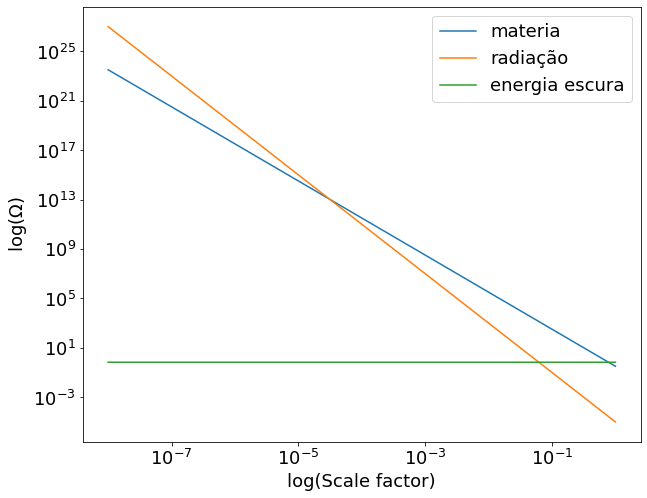

In [71]:
a=np.linspace(1e-8,1.0,1500)

materia=np.empty(len(a))
radiação=np.empty(len(a))
dark=np.empty(len(a))

for i in range (len(a)):
    materia[i]=0.320/(a[i]**(3))
    radiação[i]=1e-5/(a[i]**(4))
    dark[i]=0.680
    
fig,ax=plt.subplots()

ax.plot(a,materia,label='materia')
ax.plot(a,radiação,label='radiação')
ax.plot(a,dark,label='energia escura')
ax.legend()
plt.yscale('log')
plt.xscale('log')
ax.set_xlabel('log(Scale factor)')
ax.set_ylabel('log($\Omega$)')